In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\User\Desktop\TCS ineternship dataset\webmd.csv')

In [3]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [4]:
data.tail()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1
362805,45-54,Stop Smoking,11/12/2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,Female,"Nausea , headache , vomiting , drowsiness, g...",3


In [5]:
# Check the no of rows and columns
data.shape

(362806, 12)

In [6]:
#statistical summary of the dataset
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [7]:
#overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [8]:
#check the column names
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

## Let us examine numerical features in the dataset 

In [9]:
data_numerical = data.select_dtypes(include=[int])
data_numerical.columns

Index(['DrugId', 'EaseofUse', 'Effectiveness', 'Satisfaction', 'UsefulCount'], dtype='object')

## Let us examine categorical features in the dataset 

In [10]:
data_categorical = data.select_dtypes(include=[object])

data_categorical.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'Reviews', 'Sex', 'Sides'], dtype='object')

### Adding Name & Race column

In [11]:
from mimesis import Person

# Initialize the Person provider
person = Person('en')

# Function to create fake names for 'n' rows
def fake_names(n):
    names = [person.name() for _ in range(n)]
    return names

# Generate fake names for 362,806 rows
names = fake_names(362806)

# Create a DataFrame with the generated names
data_name = pd.DataFrame(names, columns=['Name'])

# Display the first few rows of the DataFrame
data_name.head()

,Name
0,Sung
1,Marty
2,Nicolas
3,Mauro
4,Johna


In [12]:
import random

# Define the race options and their respective probabilities
options = [("White", 0.32), ("Hispanic", 0.28), ("Black", 0.22), ("Asian", 0.18)]

# Generate random race values for 362,806 rows
words = [random.choices([o[0] for o in options], [o[1] for o in options])[0] for _ in range(362806)]

# Create a DataFrame with the generated race values
data_race = pd.DataFrame(words, columns=['Race'])

# Display the first few rows of the DataFrame
data_race.head()

,Race
0,Asian
1,White
2,Hispanic
3,Asian
4,Hispanic


In [13]:
data1 = pd.concat([data_name, data_race, data], axis=1).reindex(data.index)
data1.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Sung,Asian,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Marty,White,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Nicolas,Hispanic,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Mauro,Asian,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Johna,Hispanic,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


### Missing Value Handling 

In [14]:
# check the null values
missing_values = data1.isna().sum()
print(missing_values)

Name              0
Race              0
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64


In [15]:
# Nan rows were dropped
data1.dropna(axis = 0, inplace = True)
data1.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [16]:
data1.shape

(362769, 14)

In [17]:
#Since Reviews is having more than half of the values as unique we can neglect this column.
data1.drop("Reviews",axis=1,inplace=True) 

### Checking each column values

In [18]:
data1['Sex'].value_counts()

Female    238203
Male       98033
           26533
Name: Sex, dtype: int64

In [19]:
data1['Age'].value_counts()

45-54         80032
55-64         75129
35-44         55010
25-34         49705
65-74         41215
19-24         24230
75 or over    15225
              12199
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: Age, dtype: int64

In [20]:
data1['Drug'].unique().tolist()

['25dph-7.5peh',
 'warfarin (bulk) 100 % powder',
 'wymzya fe',
 '12 hour nasal relief spray, non-aerosol',
 'pyrogallol crystals',
 'lyza',
 'lysiplex plus liquid',
 'lysteda',
 'pyrithione zinc shampoo',
 'lysine acetate 4,000 mg oral powder packet',
 'lynparza tablet',
 'lynparza',
 'lymphazurin vial',
 'lyrica',
 'lysodren',
 'lydia pinkham herbal',
 'pyrithione zinc bar',
 'lycopene',
 'pyrilamine-chlophedianol liquid',
 'pyrilamine maleate powder',
 'pyridoxine hcl',
 'pyridostigmine bromide solution',
 'pyridostigmine bromide',
 'pyridostigmine bromide (bulk) 100 % powder',
 'pyrethrins-piperonyl butoxide shampoo',
 'pyrantel pamoate suspension',
 'pyrazinamide',
 'pyridium',
 'pylera',
 'luxiq foam',
 'luxamend cream',
 'lmx 5 cream',
 'lmx 4 cream',
 'loestrin',
 'lo-zumandimine (28) 3 mg-0.02 mg tablet contraceptives',
 'loxapine',
 'low-ogestrel',
 'low dose aspirin ec',
 'lovenox syringe',
 'lovaza',
 'lovastatin tablet, extended release 24 hr',
 'lovastatin',
 'loutrex cre

In [21]:
data1['Drug'].nunique()

7093

In [22]:
data1['Drug'].value_counts()

cymbalta                                 4648
lisinopril                               4267
lisinopril solution                      4267
lexapro                                  4134
hydrocodone-acetaminophen                3943
                                         ... 
huperzine serrate a (bulk) 1 % powder       1
sorbsan topical wound dressing 3" x         1
q-pap extra strength                        1
symax                                       1
vanadium granules                           1
Name: Drug, Length: 7093, dtype: int64

In [23]:
data1['Satisfaction'].value_counts()

5     111537
1     100897
4      63149
3      51846
2      35337
6          2
10         1
Name: Satisfaction, dtype: int64

In [24]:
data1['Effectiveness'].value_counts()

5     130375
4      81815
3      60397
1      59384
2      30795
6          2
10         1
Name: Effectiveness, dtype: int64

In [25]:
data1['EaseofUse'].value_counts()

5     192635
4      74721
3      41298
1      35926
2      18186
6          2
10         1
Name: EaseofUse, dtype: int64

In [26]:
data1 = data1.drop(data1[(data1['Satisfaction'] == 10) | (data1['Satisfaction'] == 6)].index, axis=0)

In [27]:
data1['Satisfaction'].value_counts()

5    111537
1    100897
4     63149
3     51846
2     35337
Name: Satisfaction, dtype: int64

In [28]:
data1['Effectiveness'].value_counts()

5    130375
4     81815
3     60397
1     59384
2     30795
Name: Effectiveness, dtype: int64

In [29]:
data1['EaseofUse'].value_counts()

5    192635
4     74721
3     41298
1     35926
2     18186
Name: EaseofUse, dtype: int64

In [30]:
data1.shape

(362766, 13)

## A drug named Lisinopril solution/Lisinopril with DrugId 6873 is selected in building a classification model to determine side effects.

In [31]:
data2 = data1[data1.DrugId == 6873]

In [32]:
data2.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount
9197,Alphonse,White,,High Blood Pressure,2/29/2020,lisinopril solution,6873,5,5,5,,"Dizziness , lightheadedness , tiredness, or ...",14
9203,Angelena,White,75 or over,High Blood Pressure,2/8/2020,lisinopril solution,6873,5,4,4,Female,"Dizziness , lightheadedness , tiredness, or ...",3
9209,Hosea,Hispanic,55-64,High Blood Pressure,1/14/2020,lisinopril solution,6873,4,5,4,Male,"Dizziness , lightheadedness , tiredness, or ...",3
9215,Chong,Asian,65-74,High Blood Pressure,10/17/2019,lisinopril solution,6873,5,5,5,Male,"Dizziness , lightheadedness , tiredness, or ...",6
9221,Adaline,Black,55-64,High Blood Pressure,10/13/2019,lisinopril solution,6873,2,4,2,Male,"Dizziness , lightheadedness , tiredness, or ...",12


In [33]:
data2.shape

(8534, 13)

In [34]:
data.Sides.nunique()

1651

In [35]:
data2['Satisfaction'].value_counts()

1    3034
5    1740
3    1440
4    1296
2    1024
Name: Satisfaction, dtype: int64

### Missing Value Handling

In [36]:
# Handling instances with whitespaces
for i in data2:
    data2[i]=np.where(data2[i]==" ",np.NAN,data2[i])
    
data2.isna().sum()

Name               0
Race               0
Age              270
Condition          0
Date               0
Drug               0
DrugId             0
EaseofUse          0
Effectiveness      0
Satisfaction       0
Sex              494
Sides              0
UsefulCount        0
dtype: int64

In [37]:
data2.dropna(axis=0, inplace = True)
data2.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [38]:
data2.shape

(7940, 13)

In [39]:
data2.Age.value_counts()

55-64         2294
45-54         2098
65-74         1474
35-44         1036
75 or over     634
25-34          340
19-24           54
13-18            6
0-2              2
7-12             2
Name: Age, dtype: int64

In [40]:
data2['Age'].replace(to_replace = ['12-Jul'], value = '7-12', inplace = True)

In [41]:
data2.Age.value_counts()

55-64         2294
45-54         2098
65-74         1474
35-44         1036
75 or over     634
25-34          340
19-24           54
13-18            6
0-2              2
7-12             2
Name: Age, dtype: int64

In [42]:
data2["Sex"].value_counts()

Female    4716
Male      3224
Name: Sex, dtype: int64

In [43]:
data2['UsefulCount'].unique()

array([  3.,   6.,  12.,  22.,  37.,  24.,   4.,  11.,  14.,  19.,  25.,
         5.,  21.,   0.,   7.,   9.,   8.,  15.,   2.,  18.,  17.,  30.,
        28.,  16.,  13.,   1.,  38.,  10.,  35.,  36.,  31.,  20.,  23.,
        58.,  62.,  52.,  40.,  54.,  26.,  33.,  27.,  32.,  34.,  29.,
        70., 113.,  44.,  46.,  83.,  63., 140.,  88.,  39., 100.,  56.,
        66.,  45.])

In [44]:
data2['Condition'].value_counts()

High Blood Pressure                                         7128
Other                                                        210
Kidney Disease from Diabetes                                 196
Heart Attack                                                 164
Chronic Heart Failure                                         72
Prevention of Recurrent Atrial Fibrillation                   40
Failure of the Left Ventricle of the Heart                    36
Migraine Prevention                                           32
Kidney Problem caused by Body Tissue Disease-Scleroderma      30
Nondiabetic Proteinuric Nephropathy                           18
Retinal Changes of Eye in a Patient with Diabetes              8
Diastolic Heart Failure                                        6
Name: Condition, dtype: int64

In [45]:
#adding index column
list1=list(range(7940))
data2=data2.set_index([list1])

In [46]:
data2.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount
0,Angelena,White,75 or over,High Blood Pressure,2/8/2020,lisinopril solution,6873.0,5.0,4.0,4.0,Female,"Dizziness , lightheadedness , tiredness, or ...",3.0
1,Hosea,Hispanic,55-64,High Blood Pressure,1/14/2020,lisinopril solution,6873.0,4.0,5.0,4.0,Male,"Dizziness , lightheadedness , tiredness, or ...",3.0
2,Chong,Asian,65-74,High Blood Pressure,10/17/2019,lisinopril solution,6873.0,5.0,5.0,5.0,Male,"Dizziness , lightheadedness , tiredness, or ...",6.0
3,Adaline,Black,55-64,High Blood Pressure,10/13/2019,lisinopril solution,6873.0,2.0,4.0,2.0,Male,"Dizziness , lightheadedness , tiredness, or ...",12.0
4,Kathey,Hispanic,55-64,High Blood Pressure,8/16/2019,lisinopril solution,6873.0,3.0,1.0,1.0,Female,"Dizziness , lightheadedness , tiredness, or ...",22.0


In [47]:
data2 = data2.drop('DrugId',axis=1)

### Correlation Matrix

<Axes: >

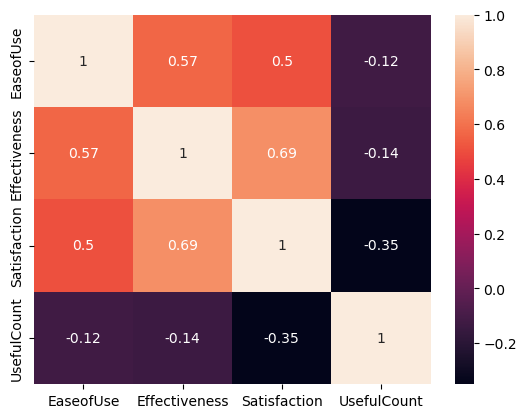

In [48]:
sns.heatmap(data2.corr(),annot=True)

#### Highlevel of correlation is seen with effectiveness and satisfaction.

### Outlier handling

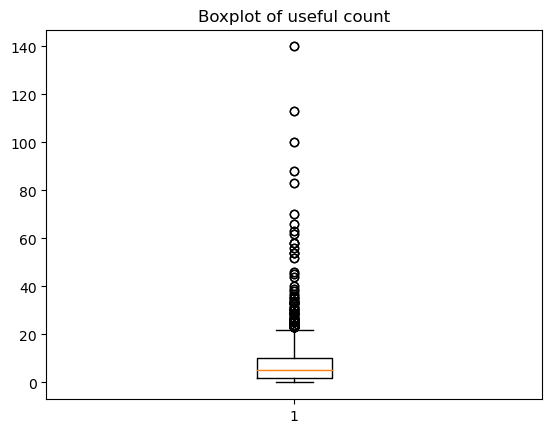

In [49]:
plt.boxplot(data2["UsefulCount"])
plt.title("Boxplot of useful count")
plt.show()


There are outliers in useful count column. We need to handle it.

In [50]:
Q1 = data2['UsefulCount'].quantile(0.25)
Q2 = data2['UsefulCount'].quantile(0.50)
Q3 = data2['UsefulCount'].quantile(0.75)

print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)

IQR = Q3-Q1
print('IQR = ',IQR)

up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR
print('up_lim = ',up_lim)
print('low_lim = ',low_lim)

outlier=[]
for x in data2['UsefulCount']:
    if (x<low_lim) or (x>up_lim):
        outlier.append(x)
print('outliers = ',outlier)

Q1 =  2.0
Q2 =  5.0
Q3 =  10.0
IQR =  8.0
up_lim =  22.0
low_lim =  -10.0
outliers =  [37.0, 24.0, 25.0, 24.0, 30.0, 24.0, 28.0, 38.0, 35.0, 36.0, 31.0, 25.0, 30.0, 30.0, 23.0, 58.0, 62.0, 52.0, 23.0, 40.0, 54.0, 25.0, 26.0, 26.0, 33.0, 27.0, 32.0, 34.0, 25.0, 23.0, 34.0, 25.0, 23.0, 26.0, 26.0, 31.0, 24.0, 24.0, 25.0, 23.0, 29.0, 25.0, 28.0, 25.0, 70.0, 23.0, 23.0, 24.0, 23.0, 27.0, 29.0, 33.0, 33.0, 23.0, 24.0, 23.0, 35.0, 26.0, 27.0, 113.0, 44.0, 26.0, 46.0, 83.0, 25.0, 63.0, 54.0, 140.0, 88.0, 39.0, 100.0, 58.0, 26.0, 29.0, 56.0, 29.0, 25.0, 23.0, 23.0, 66.0, 45.0, 33.0, 37.0, 24.0, 25.0, 24.0, 30.0, 24.0, 28.0, 38.0, 35.0, 30.0, 30.0, 23.0, 58.0, 62.0, 52.0, 23.0, 40.0, 54.0, 25.0, 32.0, 34.0, 25.0, 23.0, 34.0, 25.0, 23.0, 26.0, 26.0, 25.0, 23.0, 29.0, 33.0, 26.0, 23.0, 35.0, 26.0, 27.0, 113.0, 44.0, 26.0, 46.0, 83.0, 31.0, 24.0, 24.0, 23.0, 23.0, 24.0, 23.0, 25.0, 54.0, 140.0, 88.0, 39.0, 100.0, 58.0, 26.0, 33.0, 27.0, 36.0, 31.0, 25.0, 25.0, 63.0, 23.0, 23.0, 66.0, 26.0, 29.0, 5

In [51]:
data2 = data2.drop(data2.loc[data2["UsefulCount"]>up_lim].index)

In [52]:
data2.shape

(7776, 12)

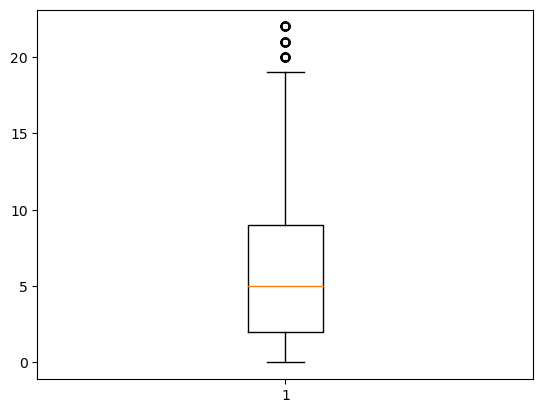

In [53]:
## Boxplot after outlier handling of Usefulcount column
plt.boxplot(data2["UsefulCount"])
plt.show()

In [54]:
data2.shape

(7776, 12)

#### Checking the 'Sides' column with respect to the values of "Effectiveness column.

In [55]:
data_effe_5 = data2[data2.Effectiveness == 5]

In [56]:
data_effe_5

,Name,Race,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount
1,Hosea,Hispanic,55-64,High Blood Pressure,1/14/2020,lisinopril solution,4.0,5.0,4.0,Male,"Dizziness , lightheadedness , tiredness, or ...",3.0
2,Chong,Asian,65-74,High Blood Pressure,10/17/2019,lisinopril solution,5.0,5.0,5.0,Male,"Dizziness , lightheadedness , tiredness, or ...",6.0
7,Shawanda,White,65-74,High Blood Pressure,5/16/2019,lisinopril solution,5.0,5.0,5.0,Male,"Dizziness , lightheadedness , tiredness, or ...",6.0
11,Georgianne,Hispanic,45-54,High Blood Pressure,3/18/2019,lisinopril solution,5.0,5.0,5.0,Female,"Dizziness , lightheadedness , tiredness, or ...",19.0
14,Bob,Hispanic,45-54,High Blood Pressure,1/26/2019,lisinopril solution,5.0,5.0,5.0,Female,"Dizziness , lightheadedness , tiredness, or ...",21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7922,Shantae,White,65-74,High Blood Pressure,5/16/2008,lisinopril,5.0,5.0,5.0,Male,"Dizziness , lightheadedness , tiredness, or ...",7.0
7929,Keenan,Asian,55-64,High Blood Pressure,5/12/2008,lisinopril,5.0,5.0,5.0,Female,"Dizziness , lightheadedness , tiredness, or ...",2.0
7932,Franklin,White,45-54,High Blood Pressure,5/10/2008,lisinopril,5.0,5.0,5.0,Female,"Dizziness , lightheadedness , tiredness, or ...",2.0
7933,Angila,Asian,45-54,High Blood Pressure,5/9/2008,lisinopril,5.0,5.0,4.0,Female,"Dizziness , lightheadedness , tiredness, or ...",3.0


In [57]:
data_effe_5['Sides'].nunique()

1

Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.

In [58]:
data_effe_4 = data2[data2.Effectiveness == 4]

In [59]:
data_effe_4.head()

,Name,Race,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount
0,Angelena,White,75 or over,High Blood Pressure,2/8/2020,lisinopril solution,5.0,4.0,4.0,Female,"Dizziness , lightheadedness , tiredness, or ...",3.0
3,Adaline,Black,55-64,High Blood Pressure,10/13/2019,lisinopril solution,2.0,4.0,2.0,Male,"Dizziness , lightheadedness , tiredness, or ...",12.0
10,Columbus,Asian,65-74,High Blood Pressure,3/21/2019,lisinopril solution,5.0,4.0,4.0,Female,"Dizziness , lightheadedness , tiredness, or ...",14.0
15,Genaro,Black,45-54,Migraine Prevention,1/25/2019,lisinopril solution,4.0,4.0,4.0,Female,"Dizziness , lightheadedness , tiredness, or ...",0.0
20,Dustin,Black,55-64,High Blood Pressure,12/11/2018,lisinopril solution,5.0,4.0,3.0,Male,"Dizziness , lightheadedness , tiredness, or ...",9.0


In [60]:
data_effe_4['Sides'].nunique()

1

In [61]:
data_effe_3 = data2[data2.Effectiveness == 3]

In [62]:
data_effe_3.head()

,Name,Race,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount
9,Julene,White,55-64,High Blood Pressure,3/27/2019,lisinopril solution,5.0,3.0,2.0,Male,"Dizziness , lightheadedness , tiredness, or ...",11.0
17,Edison,Asian,35-44,High Blood Pressure,1/6/2019,lisinopril solution,5.0,3.0,2.0,Female,"Dizziness , lightheadedness , tiredness, or ...",7.0
26,Rafael,Hispanic,65-74,High Blood Pressure,9/7/2018,lisinopril solution,2.0,3.0,3.0,Male,"Dizziness , lightheadedness , tiredness, or ...",2.0
32,Keith,White,45-54,High Blood Pressure,4/26/2018,lisinopril solution,3.0,3.0,3.0,Male,"Dizziness , lightheadedness , tiredness, or ...",7.0
33,Katherina,Hispanic,55-64,High Blood Pressure,4/20/2018,lisinopril solution,5.0,3.0,2.0,Female,"Dizziness , lightheadedness , tiredness, or ...",11.0


In [63]:
data_effe_3['Sides'].nunique()

1

In [64]:
data_effe_2 = data2[data2.Effectiveness == 2]

In [65]:
data_effe_2.head()

,Name,Race,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount
8,Williemae,White,65-74,High Blood Pressure,5/6/2019,lisinopril solution,3.0,2.0,2.0,Female,"Dizziness , lightheadedness , tiredness, or ...",4.0
19,Micheal,White,25-34,High Blood Pressure,12/11/2018,lisinopril solution,2.0,2.0,2.0,Male,"Dizziness , lightheadedness , tiredness, or ...",11.0
23,Sung,Black,65-74,High Blood Pressure,10/20/2018,lisinopril solution,2.0,2.0,1.0,Female,"Dizziness , lightheadedness , tiredness, or ...",15.0
30,Lorenzo,Hispanic,55-64,High Blood Pressure,5/31/2018,lisinopril solution,2.0,2.0,1.0,Male,"Dizziness , lightheadedness , tiredness, or ...",19.0
61,Kasha,White,45-54,High Blood Pressure,3/21/2017,lisinopril solution,2.0,2.0,2.0,Female,"Dizziness , lightheadedness , tiredness, or ...",8.0


In [66]:
data_effe_2['Sides'].nunique()

1

In [67]:
data_effe_1 = data2[data2.Effectiveness == 1]

In [68]:
data_effe_1.head()

,Name,Race,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount
4,Kathey,Hispanic,55-64,High Blood Pressure,8/16/2019,lisinopril solution,3.0,1.0,1.0,Female,"Dizziness , lightheadedness , tiredness, or ...",22.0
13,Apolonia,Asian,75 or over,High Blood Pressure,2/11/2019,lisinopril solution,5.0,1.0,1.0,Male,"Dizziness , lightheadedness , tiredness, or ...",5.0
18,Floyd,Hispanic,55-64,High Blood Pressure,12/21/2018,lisinopril solution,5.0,1.0,1.0,Male,"Dizziness , lightheadedness , tiredness, or ...",12.0
21,Merilyn,Black,45-54,High Blood Pressure,12/8/2018,lisinopril solution,1.0,1.0,1.0,Female,"Dizziness , lightheadedness , tiredness, or ...",19.0
22,Bryanna,Hispanic,45-54,High Blood Pressure,12/7/2018,lisinopril solution,5.0,1.0,1.0,Male,"Dizziness , lightheadedness , tiredness, or ...",8.0


In [69]:
data_effe_1['Sides'].nunique()

1

##### **The column 'Sides' is unique.

## Feature deduction

#### **Here we can drop the columns of 'Drug', ,'Sides' because it is common. The other columns such as date can also be dropped. The column 'Name' can also be dropped ,since name doesnt deal with the side effects of a drug.

In [70]:
data2 = data2.drop(['Date','Drug','Sides','Name'],axis=1)

In [71]:
data2.head()

,Race,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount
0,White,75 or over,High Blood Pressure,5.0,4.0,4.0,Female,3.0
1,Hispanic,55-64,High Blood Pressure,4.0,5.0,4.0,Male,3.0
2,Asian,65-74,High Blood Pressure,5.0,5.0,5.0,Male,6.0
3,Black,55-64,High Blood Pressure,2.0,4.0,2.0,Male,12.0
4,Hispanic,55-64,High Blood Pressure,3.0,1.0,1.0,Female,22.0


### Recode the values of Effectiveness to a categorical values.

In [72]:
data2['Effectiveness'].replace(to_replace = [1], value =['extreme severe side effects'], inplace = True)
data2['Effectiveness'].replace(to_replace = [2], value =['severe side effects'], inplace = True)
data2['Effectiveness'].replace(to_replace = [3], value =['moderate side effects'], inplace = True)
data2['Effectiveness'].replace(to_replace = [4], value =['mild side effects'], inplace = True)
data2['Effectiveness'].replace(to_replace = [5], value =['no side effects'], inplace = True)

In [73]:
data2.head()

,Race,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount
0,White,75 or over,High Blood Pressure,5.0,mild side effects,4.0,Female,3.0
1,Hispanic,55-64,High Blood Pressure,4.0,no side effects,4.0,Male,3.0
2,Asian,65-74,High Blood Pressure,5.0,no side effects,5.0,Male,6.0
3,Black,55-64,High Blood Pressure,2.0,mild side effects,2.0,Male,12.0
4,Hispanic,55-64,High Blood Pressure,3.0,extreme severe side effects,1.0,Female,22.0


### Pie chart of Percentage of Effectiveness.

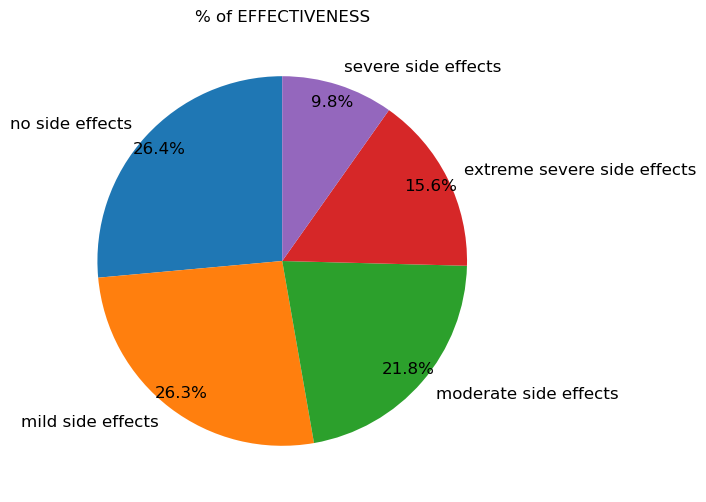

In [74]:
plt.figure(figsize=(10,6))
plt.title('% of EFFECTIVENESS')
tr = pd.DataFrame(data2['Effectiveness'].value_counts())
tr_names = tr.index
count = tr['Effectiveness']
plt.style.use('ggplot')
plt.rc('font', size=12)
plt.pie(count, autopct='%1.1f%%', labels = tr_names, pctdistance=0.9, labeldistance=1.1,shadow=False, startangle=90)

plt.show()

26.4% of people say that there are no side effects.

### Effect of Drug on Age group 55-64(most commonly used by)

In [75]:
dt=data2.loc[(data2['Age']=="55-64")]

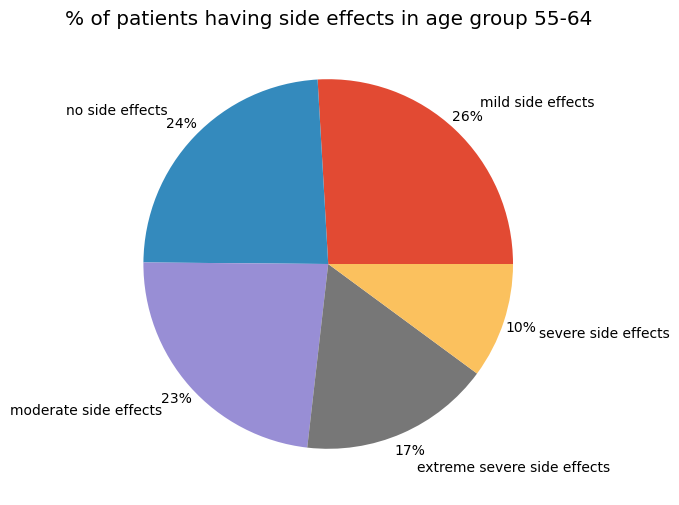

In [76]:
tr = pd.DataFrame(dt['Effectiveness'].value_counts())
tr_names = tr.index
count=tr['Effectiveness']

plt.style.use('ggplot')
plt.figure(figsize=(6,6))
plt.rc('font', size=10)
plt.pie(count, autopct='%1.0f%%', labels = tr_names, pctdistance=1.1, labeldistance=1.2)
plt.title('% of patients having side effects in age group 55-64')

plt.show()

## Label encoding

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ["Race","Age","Condition","Sex"]:
    data2[col]=le.fit_transform(data2[col]) 

In [78]:
encoded_values = dict(zip(le.classes_, le.transform(le.classes_)))
print(encoded_values)

{'Female': 0, 'Male': 1}


In [79]:
data2.head()

,Race,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount
0,3,9,4,5.0,mild side effects,4.0,0,3.0
1,2,6,4,4.0,no side effects,4.0,1,3.0
2,0,7,4,5.0,no side effects,5.0,1,6.0
3,1,6,4,2.0,mild side effects,2.0,1,12.0
4,2,6,4,3.0,extreme severe side effects,1.0,0,22.0


In [80]:
data2.shape

(7776, 8)

## Data Splitting

In [81]:
x = data2.drop('Effectiveness', axis=1)
y = data2['Effectiveness']

In [82]:
x.shape, y.shape

((7776, 7), (7776,))

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=42)

## Model selection

### Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
model = logit_model.fit(x_train,y_train)

In [86]:
y_pred_lr = model.predict(x_test)

In [87]:
#checking the accuracy of the model
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = {:.3f}'.format(accuracy_score(y_test, y_pred_lr)))
print("confusion matrix is",confusion_matrix(y_test,y_pred_lr))

Accuracy = 0.514
confusion matrix is [[249  20  28   0   0]
 [ 76 205  58 174   1]
 [ 97 117 140  50   6]
 [ 34  54  30 402   0]
 [ 97  28  67   7   4]]


### k-Nearest Neighbour

In [88]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski',p=2)
    Classifier.fit(x_train,y_train)
    y_pred_knn = Classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

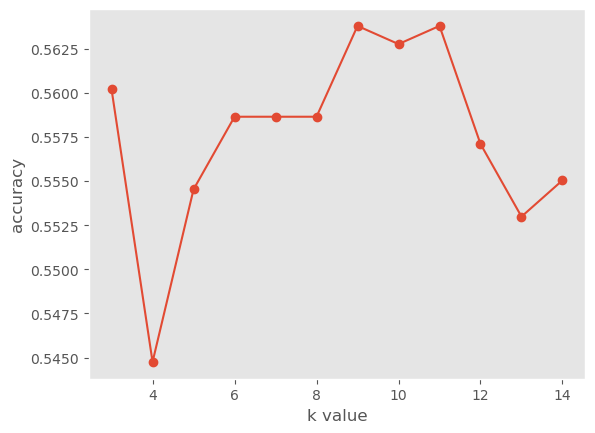

In [89]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [90]:
# Model creation using selected k value
Classifier = KNeighborsClassifier(n_neighbors = 8,metric = 'minkowski',p=2)
Classifier.fit(x_train,y_train)
y_pred_knn = Classifier.predict(x_test)

print('Accuracy = {:.3f}'.format(accuracy_score(y_test, y_pred_knn)))
print('Confusion matrix = ',confusion_matrix(y_test,y_pred_knn))

Accuracy = 0.559
Confusion matrix =  [[200  28  36   8  25]
 [ 49 276  83  99   7]
 [ 66  92 202  33  17]
 [ 38  70  41 368   3]
 [ 66  34  48  15  40]]


### Linear SVM

In [91]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)
y_pred_svm=svmclf.predict(x_test)

In [92]:
print('Accuracy = {:.3f}'.format(accuracy_score(y_test, y_pred_svm)))
print('Confusion matrix = ',confusion_matrix(y_test,y_pred_svm))

Accuracy = 0.511
Confusion matrix =  [[283   5   9   0   0]
 [106 181  55 172   0]
 [130 101 130  49   0]
 [ 67  43  11 399   0]
 [121  22  54   6   0]]


### RBF SVM

In [93]:
svmclf1=SVC(kernel='rbf')
svmclf1.fit(x_train,y_train)
y_pred_svm_rbf=svmclf1.predict(x_test)

In [94]:
print('Accuracy = {:.3f}'.format(accuracy_score(y_test, y_pred_svm_rbf)))
print('Confusion matrix = ',confusion_matrix(y_test,y_pred_svm_rbf))

Accuracy = 0.554
Confusion matrix =  [[259   3  35   0   0]
 [ 71 269  96  78   0]
 [107 103 192   8   0]
 [ 51  78  35 356   0]
 [114  18  70   0   1]]


### Polynomial SVM

In [95]:
svmclf2=SVC(kernel='poly')
svmclf2.fit(x_train,y_train)
y_pred_svm_poly=svmclf2.predict(x_test)

In [96]:
print('Accuracy = {:.3f}'.format(accuracy_score(y_test, y_pred_svm_poly)))
print('Confusion matrix = ',confusion_matrix(y_test,y_pred_svm_poly))

Accuracy = 0.546
Confusion matrix =  [[281   1  13   2   0]
 [104 212 113  85   0]
 [129  60 206  14   1]
 [ 67  65  28 360   0]
 [122   8  67   3   3]]


### Gradient Boosting Classifier

In [97]:
from sklearn.ensemble import GradientBoostingClassifier
# Instantiate Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=42,
                                 max_features=5 )
# Fit to training set
gbc.fit(x_train,y_train)
 
# Predict on test set
y_pred_gbc = gbc.predict(x_test)
 
# accuracy
acc = accuracy_score(y_test,y_pred_gbc)
print("Gradient Boosting Classifier accuracy is : {:.3f}".format(acc))

Gradient Boosting Classifier accuracy is : 0.612


In [98]:
print('Confusion matrix = ',confusion_matrix(y_test,y_pred_gbc))

Confusion matrix =  [[228  15  25  17  12]
 [ 31 306  74  92  11]
 [ 61  75 222  31  21]
 [ 40  61  42 375   2]
 [ 54  26  43  22  58]]


### Bernoulli Naive Bayes

In [99]:
from sklearn.naive_bayes import BernoulliNB
BNB=BernoulliNB()
BNB.fit(x_train,y_train)
y_pred_bnb=BNB.predict(x_test)

In [100]:
print('Accuracy = {:.3f}'.format(accuracy_score(y_test, y_pred_bnb)))
print('Confusion matrix = ',confusion_matrix(y_test,y_pred_bnb))

Accuracy = 0.268
Confusion matrix =  [[  0  71   3 223   0]
 [  0 136   1 377   0]
 [  0 120   6 284   0]
 [  0 135   6 379   0]
 [  0  50   3 150   0]]


### Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

print('Accuracy = {:.3f}'.format(accuracy_score(y_test, y_pred_dt)))
print('Confusion matrix = ',confusion_matrix(y_test,y_pred_dt))

Accuracy = 0.633
Confusion matrix =  [[203  14  38  18  24]
 [ 31 313  69  76  25]
 [ 45  63 247  27  28]
 [ 23  91  34 368   4]
 [ 30  24  38  12  99]]


In [102]:
#Classification Report
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred_dt)
print(report)

                             precision    recall  f1-score   support

extreme severe side effects       0.61      0.68      0.65       297
          mild side effects       0.62      0.61      0.61       514
      moderate side effects       0.58      0.60      0.59       410
            no side effects       0.73      0.71      0.72       520
        severe side effects       0.55      0.49      0.52       203

                   accuracy                           0.63      1944
                  macro avg       0.62      0.62      0.62      1944
               weighted avg       0.63      0.63      0.63      1944



### Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

In [104]:
print('Accuracy = {:.3f}'.format(accuracy_score(y_test, y_pred_rf)))
print("confusion matrix is",confusion_matrix(y_test,y_pred_rf))

Accuracy = 0.634
confusion matrix is [[197  17  39  19  25]
 [ 30 297  83  87  17]
 [ 49  59 245  35  22]
 [ 22  65  32 393   8]
 [ 30  15  45  13 100]]


In [105]:
#CLassification Report
report_rf = classification_report(y_test,y_pred_rf)
print(report_rf)

                             precision    recall  f1-score   support

extreme severe side effects       0.60      0.66      0.63       297
          mild side effects       0.66      0.58      0.61       514
      moderate side effects       0.55      0.60      0.57       410
            no side effects       0.72      0.76      0.74       520
        severe side effects       0.58      0.49      0.53       203

                   accuracy                           0.63      1944
                  macro avg       0.62      0.62      0.62      1944
               weighted avg       0.63      0.63      0.63      1944



### Ridge Classifier

In [106]:
from sklearn.linear_model import RidgeClassifier
rid_clf = RidgeClassifier()
rid_clf.fit(x_train, y_train)
y_pred_rid = rid_clf.predict(x_test)

# metrics
print('Accuracy = {:.3f}'.format(accuracy_score(y_test, y_pred_rid)))
print("confusion matrix is",confusion_matrix(y_test,y_pred_rid))


#CLassification Report
report_rid = classification_report(y_test,y_pred_rid)
print(report_rid)

Accuracy = 0.400
confusion matrix is [[203  10  80   4   0]
 [ 64  46  71 333   0]
 [121  74  97 118   0]
 [ 13  21  54 432   0]
 [103  19  62  19   0]]
                             precision    recall  f1-score   support

extreme severe side effects       0.40      0.68      0.51       297
          mild side effects       0.27      0.09      0.13       514
      moderate side effects       0.27      0.24      0.25       410
            no side effects       0.48      0.83      0.61       520
        severe side effects       0.00      0.00      0.00       203

                   accuracy                           0.40      1944
                  macro avg       0.28      0.37      0.30      1944
               weighted avg       0.32      0.40      0.33      1944



### Bagging Classifier

In [107]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier()
bag_clf.fit(x_train, y_train)
y_pred_bag = bag_clf.predict(x_test)

# metrics
print('Accuracy = {:.3f}'.format(accuracy_score(y_test, y_pred_bag)))
print("confusion matrix is",confusion_matrix(y_test,y_pred_bag))


#CLassification Report
report_bag = classification_report(y_test,y_pred_bag)
print(report_bag)

Accuracy = 0.629
confusion matrix is [[191  17  37  18  34]
 [ 26 297  74  97  20]
 [ 44  60 244  36  26]
 [ 19  72  30 390   9]
 [ 31  21  38  12 101]]
                             precision    recall  f1-score   support

extreme severe side effects       0.61      0.64      0.63       297
          mild side effects       0.64      0.58      0.61       514
      moderate side effects       0.58      0.60      0.59       410
            no side effects       0.71      0.75      0.73       520
        severe side effects       0.53      0.50      0.51       203

                   accuracy                           0.63      1944
                  macro avg       0.61      0.61      0.61      1944
               weighted avg       0.63      0.63      0.63      1944



## Random forest classifier algorithm gives high accuracy score.

## Hyperparameter tuning

### RandomizedSearchCV 

In [108]:
from sklearn.model_selection import RandomizedSearchCV

In [109]:
n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features = ['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(start=10,stop=1000,num=10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1,2,4,6,8]

In [110]:
#making dictionary

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'criterion':['entropy','gini','log_loss']}

In [111]:
rf = RandomForestClassifier()

In [112]:
rf_randomcv = RandomizedSearchCV(estimator = rf,param_distributions=random_grid,n_iter=100,
                                cv=3,verbose=2,random_state=100,n_jobs=-1)
rf_randomcv.fit(x_train,y_train)
#estimator: which algorithm

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini',
                                                      'log_loss'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [113]:
rf_randomcv.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 890,
 'criterion': 'gini'}

In [114]:
rf_randomcv.best_estimator_

RandomForestClassifier(max_depth=890, max_features='auto', min_samples_leaf=2,
                       n_estimators=800)

In [115]:
best_random = rf_randomcv.best_estimator_

In [116]:
y_pred_rf_random = best_random.predict(x_test)
print(confusion_matrix(y_test,y_pred_rf_random))
print(accuracy_score(y_test,y_pred_rf_random))
print(classification_report(y_test,y_pred_rf_random))

[[220  16  29  13  19]
 [ 34 297  76  93  14]
 [ 60  62 236  32  20]
 [ 27  59  32 395   7]
 [ 38  17  52  12  84]]
0.6337448559670782
                             precision    recall  f1-score   support

extreme severe side effects       0.58      0.74      0.65       297
          mild side effects       0.66      0.58      0.62       514
      moderate side effects       0.56      0.58      0.57       410
            no side effects       0.72      0.76      0.74       520
        severe side effects       0.58      0.41      0.48       203

                   accuracy                           0.63      1944
                  macro avg       0.62      0.61      0.61      1944
               weighted avg       0.63      0.63      0.63      1944



### GridSearchCV 

In [117]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf']+2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [890], 'max_features': ['auto'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [600, 700, 800, 900, 1000]}


In [118]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf,param_grid=param_grid,
                                cv=10,verbose=2,n_jobs=-1)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [890],
                         'max_features': ['auto'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [600, 700, 800, 900, 1000]},
             verbose=2)

In [119]:
best_grid = grid_search.best_estimator_

In [120]:
prediction = best_grid.predict(x_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[217  16  32  13  19]
 [ 36 297  75  92  14]
 [ 57  63 236  34  20]
 [ 28  64  31 390   7]
 [ 36  21  54  13  79]]
0.6270576131687243
                             precision    recall  f1-score   support

extreme severe side effects       0.58      0.73      0.65       297
          mild side effects       0.64      0.58      0.61       514
      moderate side effects       0.55      0.58      0.56       410
            no side effects       0.72      0.75      0.73       520
        severe side effects       0.57      0.39      0.46       203

                   accuracy                           0.63      1944
                  macro avg       0.61      0.60      0.60      1944
               weighted avg       0.63      0.63      0.62      1944



##### After the hyperparameter tuning of random forest classifier alogorithm, there is no increase the accuracy score, hence model without tuning selected as the best.

### Evaluating Model

In [121]:
y_test.value_counts()

no side effects                520
mild side effects              514
moderate side effects          410
extreme severe side effects    297
severe side effects            203
Name: Effectiveness, dtype: int64

In [122]:
df=pd.DataFrame({"y_predicted": y_pred_rf,"original":y_test})
df.head()

,y_predicted,original
1469,moderate side effects,mild side effects
2813,no side effects,no side effects
3554,extreme severe side effects,extreme severe side effects
5154,no side effects,no side effects
3077,mild side effects,no side effects


In [123]:
pd.crosstab(df["y_predicted"],df["original"])

original,extreme severe side effects,mild side effects,moderate side effects,no side effects,severe side effects
y_predicted,,,,,
extreme severe side effects,197,30,49,22,30
mild side effects,17,297,59,65,15
moderate side effects,39,83,245,32,45
no side effects,19,87,35,393,13
severe side effects,25,17,22,8,100
